# Workbook #3: MLE and Logistic regression


# Maximum Likelihood Estimation
Maximum likelihood (ML) is a estimation technique using calculus to find the optimal model and parameters based on the data and probability distribution. In OLS regression the least squares approach is used, however in cases with more complicated models such as logistic or spatial analysis, OLS is not possible. 

In order to estimate using ML you need to determine the following:
* Need a likelihood function of the probability distribution. The most within social statistics are binomial and normal distributions. There are lots of [here](https://en.wikipedia.org/wiki/List_of_probability_distributions).
* Take the partial derivative of the likelihood function.
* Set that to 0 to find the maximize fit.

In Stata, you can make programs to using ML. That is a beyond the scope of this class.

In [8]:
sysuse auto, clear
desc


(1978 Automobile Data)


Contains data from C:\Program Files (x86)\Stata15\ado\base/a/auto.dta
  obs:            74                          1978 Automobile Data
 vars:            12                          13 Apr 2016 17:45
 size:         3,182                          (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
make            str18   %-18s                 Make and Model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair Record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int

In [10]:
*This command is using ML approach to find the highest log likelihood. Here we state we want to use normal distn.  
mlexp (ln(normalden(turn, {xb: length headroom _cons}, {sigma})))



initial:       log likelihood =     -<inf>  (could not be evaluated)
feasible:      log likelihood =  -8418.567
rescale:       log likelihood = -327.16314
rescale eq:    log likelihood = -215.53986
Iteration 0:   log likelihood = -215.53986  (not concave)
Iteration 1:   log likelihood = -213.33393  (not concave)
Iteration 2:   log likelihood = -211.10633  (not concave)
Iteration 3:   log likelihood = -209.60733  (not concave)
Iteration 4:   log likelihood = -207.93915  (not concave)
Iteration 5:   log likelihood = -206.44105  (not concave)
Iteration 6:   log likelihood = -205.20223  (not concave)
Iteration 7:   log likelihood = -204.12036  (not concave)
Iteration 8:   log likelihood = -203.00326  (not concave)
Iteration 9:   log likelihood = -202.18468  (not concave)
Iteration 10:  log likelihood = -201.42769  (not concave)
Iteration 11:  log likelihood = -200.63714  (not concave)
Iteration 12:  log likelihood = -199.89216  (not concave)
Iteration 13:  log likelihood = -199.18299  (n

In [9]:
*running OLS and it is very similar
regress turn length headroom


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =    105.15
       Model |  1056.24689         2  528.123446   Prob > F        =    0.0000
    Residual |  356.617973        71  5.02278836   R-squared       =    0.7476
-------------+----------------------------------   Adj R-squared   =    0.7405
       Total |  1412.86486        73  19.3543132   Root MSE        =    2.2412

------------------------------------------------------------------------------
        turn |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      length |   .1737846   .0137556    12.63   0.000     .1463566    .2012125
    headroom |  -.1542078    .362044    -0.43   0.671     -.876103    .5676874
       _cons |   7.450477   2.243293     3.32   0.001     2.977477    11.92348
--------------------------------------------------

ML lets us estimate more advanced models like logitistic, multilevel, etc...

# Logistic regression
When you have a dependent variable that is categorical, you must use logistic regression.

In Applied Logistic Regression chapter 1, use data of age and coronary heart disease. Where  coronary heart disease is the dependent variable (the variable we are interested in explaining). Age is the independent variable (the variable we think explains coronary heart disease).

In [1]:
cd "C:\Users\cam\Downloads\alr\logistic\"

import delimited "chdage.dat", delimiters(" ") clear
keep v7 v8 v9 v16 v17 v18 v26 v27 v28

gen c1=v8
replace c1=v7 if v7!=.
replace c1=v9 if v9!=.

gen c2=v16
replace c2=v17 if v17!=.
replace c2=v18 if v18!=.

gen c3=v26
replace c3=v27 if v27!=.
replace c3=v28 if v28!=.

keep c1 c2 c3
rename c1 id
rename c2 age
rename c3 chd

save chdage.dta, replace

use chdage.dta, clear


C:\Users\cam\Downloads\alr\logistic

(28 vars, 100 obs)


(10 missing values generated)

(1 real change made)

(9 real changes made)

(99 missing values generated)

(90 real changes made)

(9 real changes made)

(99 missing values generated)

(90 real changes made)

(9 real changes made)





file chdage.dta saved



In [2]:
desc
list



Contains data from chdage.dta
  obs:           100                          
 vars:             3                          23 Apr 2025 11:54
 size:         1,200                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
age             float   %9.0g                 
chd             float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 


     +-----------------+
     |  id   age   chd |
     |-----------------|
  1. |   1    20     0 |
  2. |   2    23     0 |
  3. |   3    24     0 |
  4. |   5    25     1 |
  5. |   4    25     0 |
     |-----------------|
  6. |   7    26     0 |
  7. |   6    26     0 |
  8. |   9    28     0 |
  9. |   8

### Here, we are trying to assess if there is a relationship between coronary heart disease and age. Here, coronary heart disease is dependent variable and age is the independent variable. Let's look at the distribution of the points with a scatter plot.

```scatter y x```

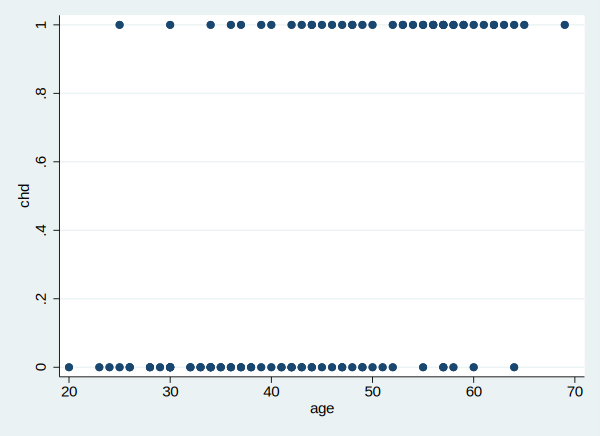

In [6]:
scatter chd age

### Its difficult to see a general trend because of the categorical variable. Let's take the average coronary heart disease of each age group to see if there a trend.

In [3]:
gen agrp=age
recode agrp 20/29=1 30/34=2 35/39=3 40/44=4 45/49=5 50/54=6 55/59=7 60/69=8

list id age agrp chd



(agrp: 100 changes made)


     +------------------------+
     |  id   age   agrp   chd |
     |------------------------|
  1. |   1    20      1     0 |
  2. |   2    23      1     0 |
  3. |   3    24      1     0 |
  4. |   5    25      1     1 |
  5. |   4    25      1     0 |
     |------------------------|
  6. |   7    26      1     0 |
  7. |   6    26      1     0 |
  8. |   9    28      1     0 |
  9. |   8    28      1     0 |
 10. |  10    29      1     0 |
     |------------------------|
 11. |  11    30      2     0 |
 12. |  13    30      2     0 |
 13. |  16    30      2     1 |
 14. |  14    30      2     0 |
 15. |  15    30      2     0 |
     |------------------------|
 16. |  12    30      2     0 |
 17. |  18    32      2     0 |
 18. |  17    32      2     0 |
 19. |  19    33      2     0 |
 20. |  20    33      2     0 |
     |------------------------|
 21. |  24    34      2     0 |
 22. |  22    34      2     0 |
 23. |  23    34      2     1 |
 24. |  21 

See how we made a categorical variable from a numeric variable.

We want to average of chd for each age group.

## Summary statistics
Summary statistics are descriptive statistics like mean, frequencies, median, etc... 

<b>Univariate statistics</b>

### SUMMARY
```summ``` command will report basic statistics for numeric variables.

```summ variable```

### TAB
```tab``` command will report frequencies for categorical variables

```tab variable```

<b>Bivariate statistics</b>
### TABSTAT
```tabstat``` command reports summary statistics for two variables, for example the average of variableA across categories of VariableB.

```tabstat variableB, by(variableA) stat(mean median min max)```

In [12]:
summ age

tab chd



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |        100       44.38    11.72133         20         69


        chd |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         57       57.00       57.00
          1 |         43       43.00      100.00
------------+-----------------------------------
      Total |        100      100.00


In [11]:
tabstat chd,by(agrp) stat(mean median min max)


Summary for variables: chd
     by categories of: agrp 

    agrp |      mean       p50       min       max
---------+----------------------------------------
       1 |        .1         0         0         1
       2 |  .1333333         0         0         1
       3 |       .25         0         0         1
       4 |  .3333333         0         0         1
       5 |  .4615385         0         0         1
       6 |      .625         1         0         1
       7 |  .7647059         1         0         1
       8 |        .8         1         0         1
---------+----------------------------------------
   Total |       .43         0         0         1
--------------------------------------------------


## Making summary statistic datasets
If we have a lot categories or groups, sometimes we want to collapse the dataset to summary statistics like average, frequencies (count), min, etc...

### COLLAPSE
```collapse``` command is a powerful that collapses the data based on summary statistics. THERE IS NO UNDUE WITH COLLAPSE SO PLEASE MAKE SURE YOU SAVE YOUR DATA.

```collapse (stat) new_variable=old_variable,by(group_variable)```

In [4]:
sort agrp
collapse (count) tot=chd (sum) present=chd, by(agrp)
list





     +----------------------+
     | agrp   tot   present |
     |----------------------|
  1. |    1    10         1 |
  2. |    2    15         2 |
  3. |    3    12         3 |
  4. |    4    15         5 |
  5. |    5    13         6 |
     |----------------------|
  6. |    6     8         5 |
  7. |    7    17        13 |
  8. |    8    10         8 |
     +----------------------+


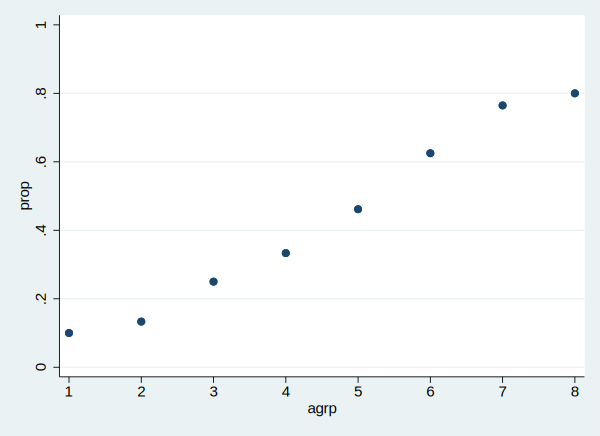

In [5]:
gen prop = present / tot
gen absent = tot - present
gen count = present + absent

scatter prop agrp, ylabel(0(.2)1) xlabel(1(1)8)

Compare this scatter plot from the previous plot that was binary. We can start to see a linear relationship.

Logistic regression uses logit to transform to a linear regression.

# Categorical variables as dependent variables
We use logistic regression to estimate a regression model with a categorical variable as the dependent variable. Logistic regression estimates the model using the logit. <b>The logit is the natural log transformation of odds ratio.</b>

In [3]:
use "http://www.stata-press.com/data/agis6/environ", clear
tab environ libcand, row




+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

Environmen |
       tal |    support liberal
concern: 1 |  candidate: 1 yes, 0
   high, 0 |          no
       low |         0          1 |     Total
-----------+----------------------+----------
         0 |         6          4 |        10 
           |     60.00      40.00 |    100.00 
-----------+----------------------+----------
         1 |         3          7 |        10 
           |     30.00      70.00 |    100.00 
-----------+----------------------+----------
     Total |         9         11 |        20 
           |     45.00      55.00 |    100.00 


<b> Probabilities</b>
* The probability of liberal candidate is 11/20 (.55)
* The probaility of a liberal candidate having low env concern is 4/10 (.4)
* The probaility of a liberal candidate having high env concern is 7/10 (.7)
* Probabilities range from 0 to 1.

<b> Odds</b>
* The ODDS of liberal candidate is 11/9 (1.22). Odds(liberal)=Odds(liberal)/Odds(not liberal)=1.22
* The ODDS of liberal candidate and having low env concern is 4/6 (.67). Odds(liberal & low env concern)/Odds(not liberal & low env concern)=4/6.
* The ODDS of both liberal candidate and having high env concern is 7/3 (2.33). Odds(liberal & high env concern)/Odds(not liberal & high env concern)=7/3
* Odds range from 0 to infinity where below 1 means lowers odds and greater than 1 means higher odds.

<b> Odd ratios</b>
* The ODDS RATIO of liberal candidate of having high environmental concern to low env concern is 3.48 (2.33/.67). The odds of a liberal candidate having high env concern is 3.48 times greater than a liberal candidate having low env concern.
* Odds ratio ranges from 0 to infinity for things more likely to happens and between 0 to 1 for things less likely to happen.
* We can natural log odd ratio to make them normally distributed.

Logit is the natural log of the odds ratio:

<center>$logit=ln(odds(p)/odds(q))$
    
<center>$logit=ln(odds ratio)$

Let's look at some of math behind the logit:

Previously, we used the following equation for regression model with contiunous outcomes:

<center>$y=a+bx$
    
Let's plug in logit (the natural log of the odds ratios (OR)) for our variables (independent and dependent variables):
<center>$logit_y=a+b*logit_x$
    
We can get back to the just the odds ratios by exponent-ing both sidestaking:
<center>$exp^{ln(OR_y)}=exp^{ln(a+b*OR_x)}$
    
This gets us back to odds ratios:
<center>$(OR_y)=(a+b*OR_x)$
    
So, when getting your coefficients estimates, they must be transformed back into odds ratios (by exponentiated).

<b>By using logits, we are basically modeling a similar regression as compared to contiunous outcomes. So, you can have interaction terms in the model. You can even have quadratic or other variable transformations. Just make sure it makes sense in terms of theory and for the data.

Logistic regression model:

$\pi(x)=\frac{e^{\beta_0+\beta_{1}x+...+\beta_{k}x}}{1+e^{\beta_0+\beta_{1}x+...+\beta_{k}x}}$

where the logit is $g(x) = ln{\frac{\pi(x)}{(1-\pi(x))}} = \beta_0 + \beta_{1}x...+\beta_{k}x$ 

It is important to note:
* Parameters are linear to each other
* There is no error term here, so we don't have "y-hat". We have predicted probabilites.

Another thing to note: logistic regression uses maximum likelihood estimation. This is not OLS. This method calculates many iterations of the distributions to figure out its positioning and uses the one with maximum likelihood. 

## Estimating logistic regression with Stata

You can estimate logistic regression using the ```logistic``` and ```logit``` commands.

### LOGISTIC
```logistic``` command will report the coefficients as odds ratios. Here is how to intepret odds ratio: a) an odds ratio below 1 means lower odds; b) an odds ratio greater than 1 means higher odds. Remember odds ratio can only range from 0 to infinity.

```logistic dep_var indep_var```

### LOGIT
```logit``` command will report the coefficients as logits (ratio of odds ratios). Here is how to intepret logits: a) a negative logit means lower odds; b) a positive logit means higher odds. Remember logit can range from negative to positive numbers.

```logit dep_var indep_var```

## Example with logistic regression

In this example, we are interested in predicting one's likelihood of drinking in the last 30 days. This variable is a categorical 0/1 variable. We will be using the following independent variables: age, having peers drinking, having dinners with family, and gender.

<center>$g(x)=  ln{\frac{\pi(x)}{(1-\pi(x))}}  = \beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i)$
    
<center>$ where \pi(x)=Pr(drink_i=1|x)$

In [3]:
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear
codebook drank30 age97 pdrink97 dinner97 male


(National Survey of Youth, 1997, selected variables from first wave)


--------------------------------------------------------------------------------
drank30                                                              (unlabeled)
--------------------------------------------------------------------------------

                  type:  numeric (float)

                 range:  [0,1]                        units:  1
         unique values:  2                        missing .:  0/8,984
       unique mv codes:  3                       missing .*:  5,165/8,984

            tabulation:  Freq.  Value
                         2,094  0
                         1,725  1
                             3  .a
                            15  .b
                         5,147  .d

--------------------------------------------------------------------------------
age97                                                 age at interview date 1997
-----------------------------------------------------------

In [4]:
summarize drank30 age97 pdrink97 dinner97 male


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     drank30 |      3,819    .4516889    .4977257          0          1
       age97 |      8,984    14.35363    1.488145         12         18
    pdrink97 |      8,799    2.136152    1.246358          1          5
    dinner97 |      5,356     5.07823    2.273635          0          7
        male |      8,984    .5119101     .499886          0          1


In [7]:
*Using "logistic" command reports the estimates in ODDS ratios
logistic drank30 age97 pdrink97 dinner97 i.male


Logistic regression                             Number of obs     =      1,654
                                                LR chi2(4)        =      78.01
                                                Prob > chi2       =     0.0000
Log likelihood = -1061.0474                     Pseudo R2         =     0.0355

------------------------------------------------------------------------------
     drank30 | Odds Ratio   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
      1.male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

This reports the odds ratio.
Here, we see that as age, % of peers drinking increases, the odds of drinking increase. Furthermore, we see that as # of dinner with family increases, the odds of drinking decreases. Men have less odds to drink as compared to women.

The odd ratios of drinking are multiplied by 1.17 for every one year increase to age. <b>For odds ratio that are greater than 1, you can substract the value by one and interpret it as a percent.</b> For exampl, for every one year increase in age, there is a 17% increase in odds of drinking. 

The odd ratios of drinking for men are .97 as compared to women. <b>For odds ratio less than 1, you can substract the value by one and interpret the value as a percent.</b> For example, the odds of drinking for men is 2% less as compared to women.

In [43]:
*Using "logit" command reports the estimates in logits so you have transform them back!
logit drank30 age97 pdrink97 dinner97 i.male


Iteration 0:   log likelihood = -1100.0502  
Iteration 1:   log likelihood =  -1061.142  
Iteration 2:   log likelihood = -1061.0474  
Iteration 3:   log likelihood = -1061.0474  

Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   .1563548   .0585158     2.67   0.008     .0416659    .2710437
    pdrink97 |   .2846336   .0450001     6.33   0.000     .1964351    .3728321
    dinner97 |  -.0596587    .022151    -2.69   0.007    -.1030739   -.0162434
        male |   -.020721  

This reports the logit. They are transformation of each other. 

<center>$exp_{logit}=(odds ratio)$

In [6]:
*You can calculate the odds ratio by exp the coef of age97
di exp(.1563548)

1.169241


### A negative logit is equal to a <u>odds ratio below 1</u>
### A positive logit is equal to a <u>odds ratio greater than 1</u>

## Practice: Logistic regression
* Q1: Open the nhanes2 dataset: https://www.stata-press.com/data/r17/nhanes2.dta
* Q2: Use codebook command on diabetes and region
* Q3: Write a logistic regression equation with diabetes as the dependent variable. Independent variables are age, rural, and region (with west as the reference category).
* Q4: Estimate the equation with Stata

<i> answers at the bottom of workbook</i>

<b> logistic regression practice</b>

In [56]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook diabetes region




--------------------------------------------------------------------------------
diabetes                                                         Diabetes status
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: diabetes

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 2/10,351

            Tabulation: Freq.   Numeric  Label
                        9,850         0  Not diabetic
                          499         1  Diabetic
                            2         .  

--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]        

<center>$Pr(diabetes_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(rural_i)+\beta_3*(northeast_i)+\beta_4*(mountainwest_i)+\beta_4*(south_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [57]:
logistic diabetes age i.rural ib4.region


Logistic regression                                     Number of obs = 10,349
                                                        LR chi2(5)    = 348.59
                                                        Prob > chi2   = 0.0000
Log likelihood = -1825.4636                             Pseudo R2     = 0.0872

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.060833   .0039663    15.79   0.000     1.053088    1.068635
             |
       rural |
      Rural  |    .925828   .0902857    -0.79   0.429     .7647545    1.120827
             |
      region |
         NE  |    1.09309   .1567141     0.62   0.535     .8253171    1.447741
         MW  |   1.108054   .1489206     0.76   0.445     .8514534    1.441986
          S  |   1.341341   .1710474     2.30   0.021     1.044707   

The odd ratios of having diabetes are multiplied by 1.06 for every one year increase to age. In other words, for every one year increase in age, there is a 6% significant increase in odds of diabetes. The odd ratios of having diabetes for rural residents are 0.93 as compared to non-rural residents however it is not significant. In other words, the odds for having diabetes for people residing in rural areas is 7% less as compared to those residing in non-rural areas. People living in the northeast are estimated to have 9% nonsignificant increase in odds in diabetes as compared to those living in the west region. Those residing in the mountain west have a 11% nonsignificant increase in odds in diabetes as compared to the west region. Southern residents have a significantly higher odds of having diabetes as compared to western residents.